# Architectural Reconstruction of Zeeguu Api

Thor Liam Møller Clausen

## Introduction

### What is the system

I chose to analyse zeeguu's api repository (https://github.com/zeeguu/api).
It is the backend for the website https://zeeguu.org/ and is written in python flask.
It is a website where users can learn languages similar to Duolingo. 
More information can be found in the repository's ```README``` file and on the website.

### What is the problem

I want to analyse the codebase for an architectural reconstruction. 
I want to find out which components are depending on each other and which are more "central" than others. By that I mean has more components depending on it. 

## Methodology

### Tools

#### GitTruck

Gives an overview of files and folders.

```bash
# from api repo
npx -y git-truck
```

Settings

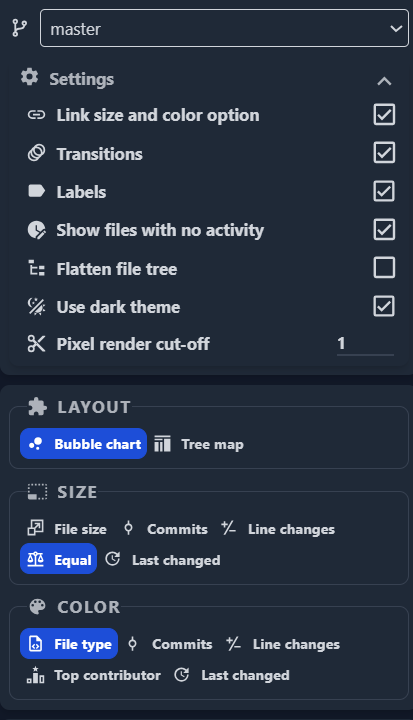

(Enabling file size instead of equal mostly just enlarges html and txt files. The python files are quite small in comparison)

#### pyan3

Makes a call graph between methods.

Needed to install graphviz.

```bash
# from api/zeeguu
pyan3 *.py */*.py */*/*.py */*/*/*.py -c -G -g --dot-rankdir LR --svg > ../../../output/pyan/thor_graph.svg
```

n: no-defines

c: colored

G: grouped-alt (looks better)

g: grouped (group  methods by files)

--dot-rankdir LR (instead of TD, makes it easier to see uses lines)


### Discarded tools

prospector and pyreverse gave the same error: 
AttributeError: 'TreeRebuilder' object has no attribute 'visit_typealias'.

## Results

### GitTruck

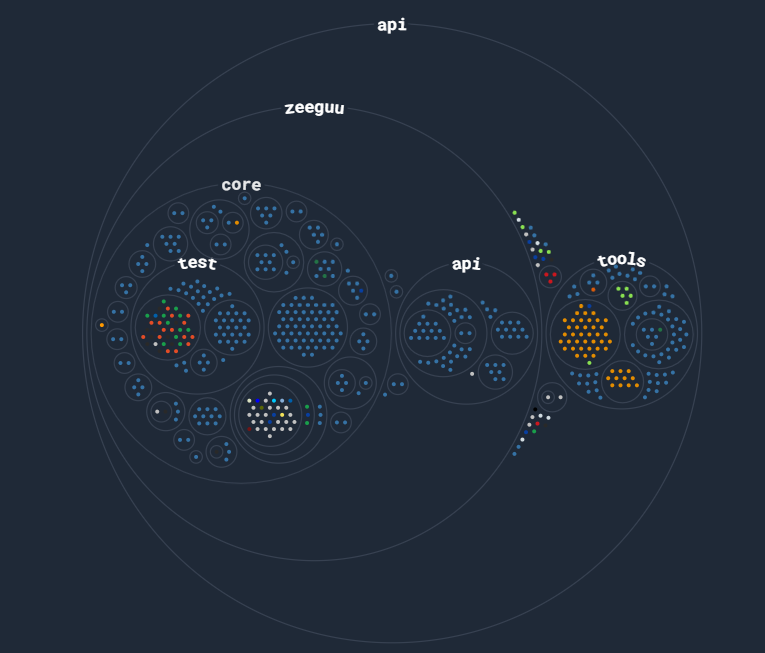

-- Outside zeeguu folder in repository --

Tools:
- Sql
- Migrations
- Report generator
- Shell scripts
- Mail sender 
- etc.

Workflows:
- Test
- Docker

-- In the zeeguu folder --

Api:
- Endpoints 
    - Helpers
    - Teacher dashboard
- Tests
- Utility

Core:
- Language
- Sql
- User stats
- Emailer
- Account management
- Test
- Model
- ...
- Word filter (They have proper nouns, profanity, city/person names, )
    - Data (contains lists of naugthy expressions for various languages, a readme that says where they got the lists)


### Pyan3

Initially I got a huge messy graph and decided to do some rough filtering. 
Based on the overview I got from GitTruck I decided not to include the tools folder and focused on the zeeguu folder since it seems most of the application logic is located there.
I also removed the test folder with the assumption that it only tests the application and isn't called by the rest of the application.

A very used module in core:

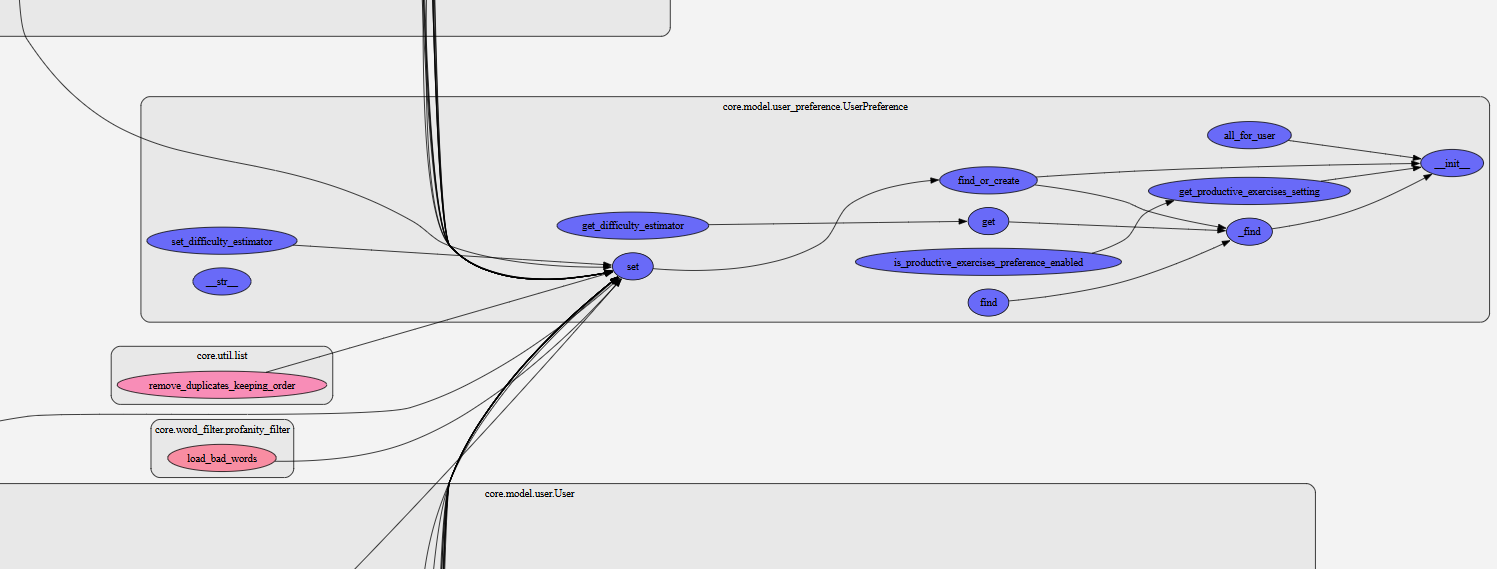

A very used module in enpoints:

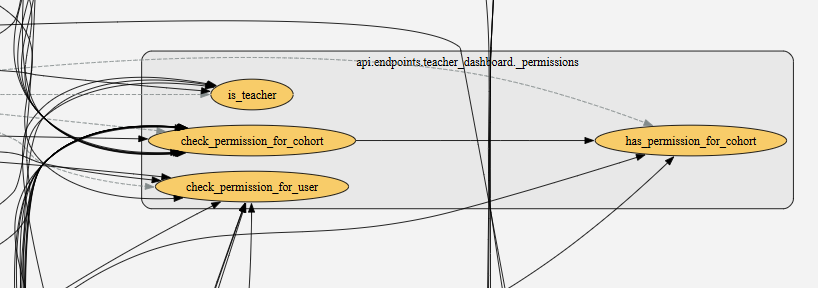

The longest path I could find was 6 edges.

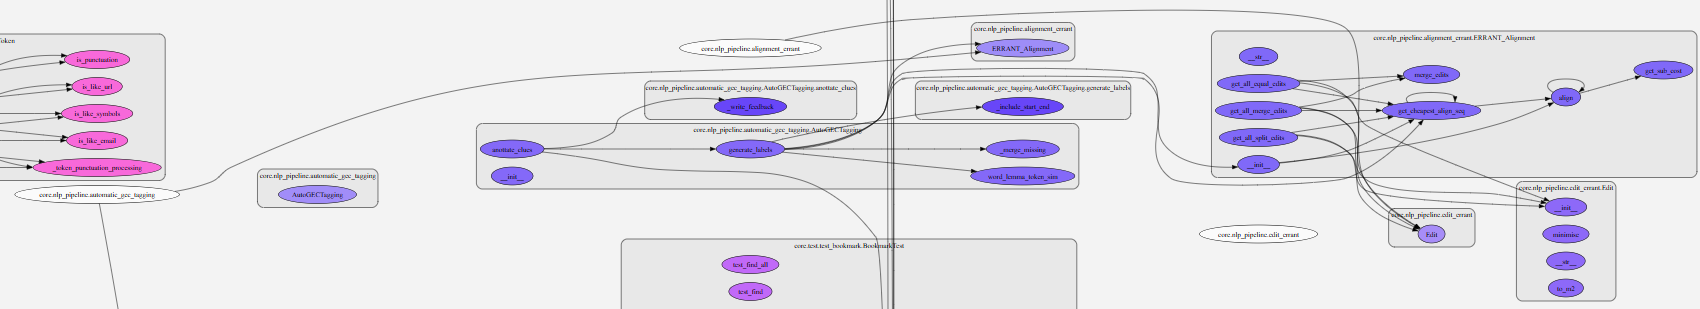

#### Pyan3 boiled down

##### Core

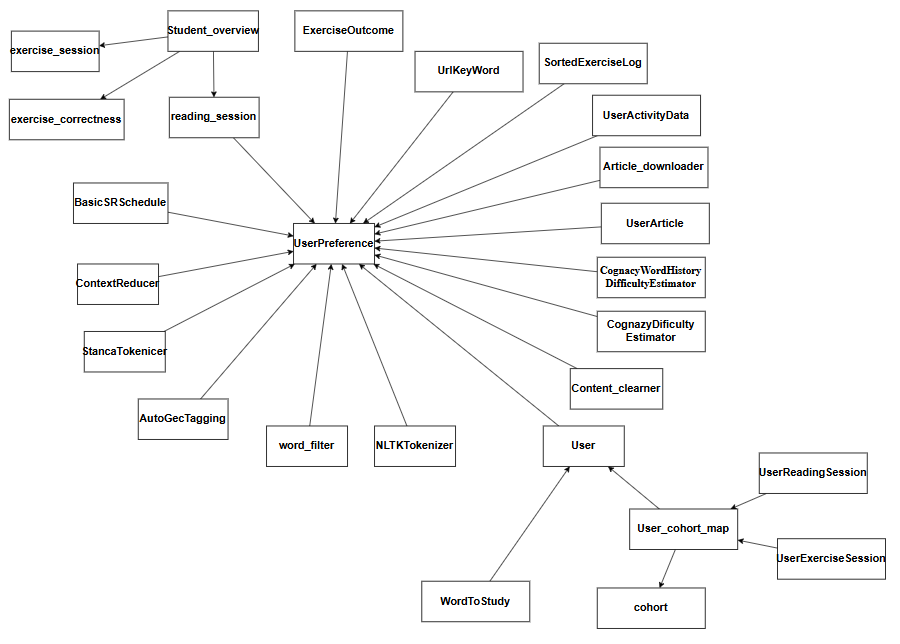

##### Endpoints

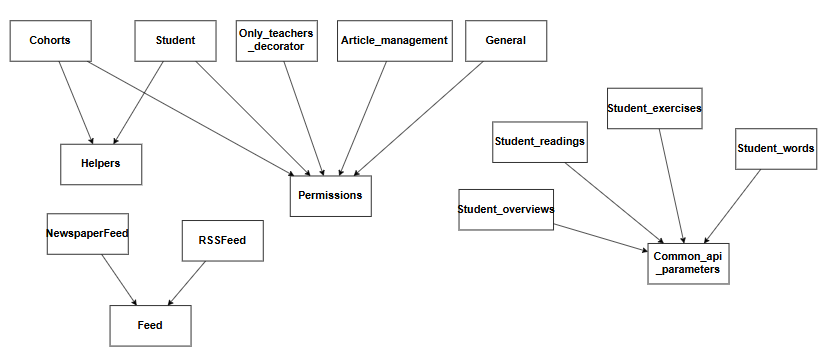

### Tool flaws

The pyan3 tool had some major flaws listed below that affects the usefulness of the results.

#### Fails to detect some method calls

```python
@api.route("/user_preferences", methods=["GET"])
@cross_domain
@requires_session
def user_preferences():
    preferences = {}
    user = User.find_by_id(flask.g.user_id)
    for each in UserPreference.all_for_user(user):
        preferences[each.key] = each.value
```

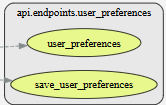

Doesn't have an arrow from the ```user_preference``` method in api to ```all_for_user``` method in core.
In general there are no edges between files in the api folder with the endpoints and the core folder.

#### Floating nodes:

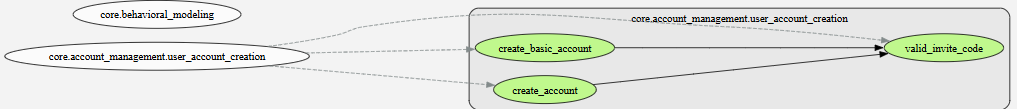

Above there is a node for the *user_acount_creation.py* file with it's methods. 

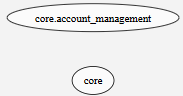

Somewhere else in the graph there are nodes without in- or out-going edges for the "core" folder and the "account_management" folder. 
To me it seems weird that these nodes are even there, when they don't have any edges and are not methods, but folders.
    

## Discussion




